# Notebook zu Blatt 8

In [ ]:
%pip install numpy seaborn

In [ ]:
import numpy as np      # um zufÃ¤llige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import sort# zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [ ]:
def selectionSort(array):
    size = len(array)
    for ind in range(size):
        min_index = ind

        for j in range(ind + 1, size):
            # select the minimum element in every iteration
            if array[j] < array[min_index]:
                min_index = j
        # swapping the elements to sort the array
        (array[ind], array[min_index]) = (array[min_index], array[ind])

In [ ]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

In [ ]:
def partition(array, low, high):

    # choose the rightmost element as pivot
    pivot = array[high]

    # pointer for greater element
    i = low - 1

    # traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:

            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1

            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])

    # Swap the pivot element with the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    # Return the position from where partition is done
    return i + 1


# function to perform quicksort
def quickSort(array, low, high):
    if low < high:
        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)

        # Recursive call on the left of pivot
        quickSort(array, low, pi - 1)

        # Recursive call on the right of pivot
        quickSort(array, pi + 1, high)

In [ ]:
array = [7,5,8,1] 
quickSort(array, 0 ,len(array)-1)
print(array) # das sortierte array

#### 2. Wie wird das Pivotelement in ihrer Implementierung gewählt?

Das Pivotelement ist das letzte Element im Array. Bei einem komplett unsortierten Array ist dies dann ein zufälliges Element.

#### 3. Gibt es für ihre Implementierung von Quicksort und Selectionsort worst-case Eingaben? Wenn ja, welche?

Quicksort: Ja, z.B. wenn das Array schon sortiert ist und so das größte Element als Pivotelement wählt, da es am Ende des Arrays sich befindet, hat man die worst-case Laufzeit von 0(n²)
Selectionsor: Nein, es gibt keine worst-case Eingabe, da Selectionsort immer eine Laufzeit von 0(n²) hat.

#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

Es wurden alle Randfälle abgedeckt, wie "Leeres Array", "nur negative Werte", "nur positive Werte", "nur gleiche Werte" und eine "normale" Eingabe.

In [ ]:
SelSort1 = [0,1,-1,1000000]
SelSort2 = []
SelSort3 = [-1, -3, -5, -1]
SelSort4 = [1, 1, 1, 1, 1]
SelSort5 = [1, 2, 3, 4, 43, 3, 32, 1, 32, 0, -4]

QuickSort1 = [0,1,-1,1000000]
QuickSort2 = []
QuickSort3 = [-1, -3, -5, -1]
QuickSort4 = [1, 1, 1, 1, 1]
QuickSort5 = [1, 2, 3, 4, 43, 3, 32, 1, 32, 0, -4]

selectionSort(SelSort1)
selectionSort(SelSort2)
selectionSort(SelSort3)
selectionSort(SelSort4)
selectionSort(SelSort5)

quickSort(QuickSort1, 0 ,len(QuickSort1) - 1)
quickSort(QuickSort2, 0 ,len(QuickSort2) - 1)
quickSort(QuickSort3, 0 ,len(QuickSort3) - 1)
quickSort(QuickSort4, 0 ,len(QuickSort4) - 1)
quickSort(QuickSort5, 0 ,len(QuickSort5) - 1)

print("Selectionsort:")
print(SelSort1)
print(SelSort2)
print(SelSort3)
print(SelSort4)
print(SelSort5)
print("")

print("Quicksort:")
print(QuickSort1)
print(QuickSort2)
print(QuickSort3)
print(QuickSort4)
print(QuickSort5)


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [ ]:
s_times, q_times = [], []
# Werte wurden erhöht um eine bessere Kurve zu bekommen
array_sizes =  [50, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung fÃ¼r verschiedenen array-lÃ¤ngen\n",
for size in array_sizes:
    # ziehe ein zufÃ¤lliges array\n",
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000, size=size)
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?\n",
    selectionSort(array)

    end = time.time()
    s_times.append(end-start) # die zeit in sekunden\n",

  #  print('The array after sorting in Ascending Order by selection sort is:')
  #  print(array)
print("SelectionSort: ")
print(s_times)
print("")

# Werte wurden erhöht um eine bessere Kurve zu bekommen
array_sizes =  [50, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung fÃ¼r verschiedenen array-lÃ¤ngen\n",
for size in array_sizes:
    # ziehe ein zufÃ¤lliges array\n",
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000, size=size)
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?\n",
    size = len(array)
    quickSort(array, 0, size - 1)

    end = time.time()

#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt. Ab welcher Eingabegröße sieht man den asymptotischen Verlauf der Laufzeit?

Ab einer Arraylänge von ca. 500 - 1000 sieht man, wie sich das asymptotische Verhalten entwickeln wird.

In [ ]:
sns.set_theme()

plt.plot(array_sizes, s_times, array_sizes, q_times)
#plt.yscale("log")
plt.xlabel("Array Size")
plt.ylabel("Time in (s)")
plt.legend(['Selectionsort','Quicksort'])
plt.axis([0, 10000, 0, 1])

#sns.lineplot(SelSortplot=s_times, QuickSortplot=q_times)

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

Die Konstanten kann man durch das Ausführen von "In 80" erhalten.

In [ ]:
s_square_selsort = np.array(array_sizes)*array_sizes
c1 = s_times[-1] / s_square_selsort[-1]
s_asympt_sel = c1*s_square_selsort


q_log_quicksort = np.log(array_sizes)* np.array(array_sizes)
c2 = q_times[-1] / q_log_quicksort[-1]
q_asympt_quick = c2*q_log_quicksort


print("SelectionSort: C = " + str(c1))
print("QuickSort: C = " + str(c2))

In [ ]:
#n_asympt = c1*n_square_selsort
sns.lineplot(x = array_sizes, y = s_times, linestyle="dashed", marker="o")
sns.lineplot(x = array_sizes, y = s_asympt_sel, linestyle="dashed", marker="o")

sns.lineplot(x = array_sizes, y = q_times, linestyle="dashed", marker="o")
sns.lineplot(x = array_sizes, y = q_asympt_quick, linestyle="dashed", marker="o")

plt.legend(['Selectionsort','', 'C-Selectionsort', '', 'Quicksort', '','C-Quicksort'])
plt.axis([0, 10000, 0, 2])
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [ ]:
p_times = []
#print("Es wurden größere Arraygrößen gewählt.")
array_sizes =  [50, 100, 500, 1000, 1500, 20000, 25000, 30000, 500000, 750000, 1000000] # messung fÃ¼r verschiedenen array-lÃ¤ngen\n",
for size in array_sizes:
    # ziehe ein zufÃ¤lliges array\n",
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000, size=size)
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?\n"
    array.sort()

    end = time.time()
    p_times.append(end-start) # die zeit in sekunden\n",

#  print('The array after sorting in Ascending Order by quick sort is:')
 #   print(array)
print("Python Sortieralgorithmus: ")
print(p_times)



In [ ]:
sns.set_theme()

plt.plot(array_sizes, p_times, array_sizes, q_times, array_sizes, s_times)
#plt.yscale("log")
plt.xlabel("Array Size")
plt.ylabel("Time in (s)")
plt.axis([0, 10000, 0, 0.5])
plt.legend(['sort()', 'quicksort()', 'selectionsort()'])

Der von Python gegebene Sortieralgorithmus ist um einiges schneller als quicksort und selectionsort. Der best-case von Quicksort ist 0(nlogn), wenn man das Pivotelement optimal wählt. Wir wählen es aber in unserer Implemenierung sozusagen zufällig. Die Laufzeit von sort() ist immer 0(nlogn). Die Eingabelänge der Arrays für sort() wurden mit Faktor 100 multipliziert, um es im Graphen besser sehen zu können. --> Die Laufzeit von sort() ist (im Durchschnitt) immer schneller als der von Quicksort.

### 9. Plot für Laufzeit von Quicksort und Selectionsort in Java

In [ ]:
java_selectionsort_times = [1.306E-4, 4.535E-4, 0.0073903, 0.0075469, 0.0169019, 0.0209696, 0.0331489, 0.0464456, 0.1328931, 0.2571736, 0.243108]

java_quicksort_times = [4.54E-5, 4.93E-5, 5.371E-4, 6.846E-4, 4.172E-4, 5.8E-4, 7.524E-4, 9.214E-4, 0.0016682, 0.0017749, 0.002344]

sns.set_theme()
plt.plot(array_sizes, s_times, array_sizes, q_times, array_sizes, java_selectionsort_times, array_sizes, java_quicksort_times)

#plt.yscale("log")
plt.xlabel("Array Size")
plt.ylabel("Time in (Milliseconds)")
plt.legend(['Python-Selectionsort', 'Python-Quicksort','Java-Selectionsort', 'Java-Quicksort'])
plt.axis([0, 10000, 0, 0.3])

#### 10. Verhältnis zwischen theoretischen Analyse und einer effizienten Implementierung? Größenordnung des Konstanten Faktors, der durch die Programmiersprache bestimmt wird?

Die theoretische Analyse ist immer besser, da man die konstanten Faktoren, die man bei einer Implementierung immer hat wegfallen. Das heißt, die Implementierung wird immer mit einem konstanten Faktor behaftet sein. Je nachdem, mit welcher Programmiersprache man arbeitet, können die Faktoren deutlich variieren, wie wir in Aufgabe 8 gesehen haben. Hierbei war der Faktor bei ziemlich genau 70 zwischen Java und Python.


Text(0, 0.5, 'Laufzeit in Sekunden')

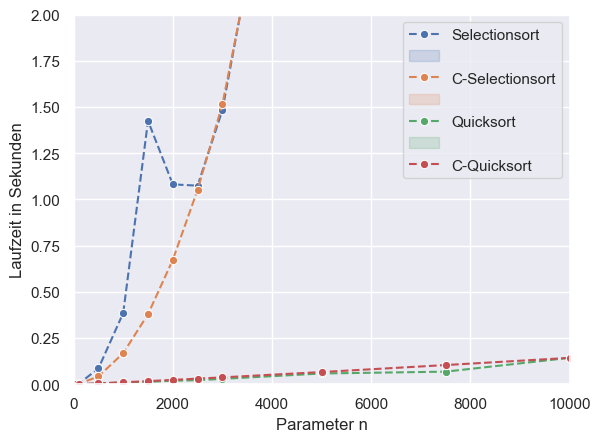

In [88]:
#n_asympt = c1*n_square_selsort
sns.lineplot(x = array_sizes, y = s_times, linestyle="dashed", marker="o")
sns.lineplot(x = array_sizes, y = s_asympt_sel, linestyle="dashed", marker="o")

sns.lineplot(x = array_sizes, y = q_times, linestyle="dashed", marker="o")
sns.lineplot(x = array_sizes, y = q_asympt_quick, linestyle="dashed", marker="o")

plt.legend(['Selectionsort','', 'C-Selectionsort', '', 'Quicksort', '','C-Quicksort'])
plt.axis([0, 10000, 0, 2])
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [60]:
p_times = []
#print("Es wurden größere Arraygrößen gewählt.")
array_sizes =  [50, 100, 500, 1000, 1500, 20000, 25000, 30000, 500000, 750000, 1000000] # messung fÃ¼r verschiedenen array-lÃ¤ngen\n",
for size in array_sizes:
    # ziehe ein zufÃ¤lliges array\n",
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000, size=size)
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?\n"
    array.sort()

    end = time.time()
    p_times.append(end-start) # die zeit in sekunden\n",

#  print('The array after sorting in Ascending Order by quick sort is:')
 #   print(array)
print("Python Sortieralgorithmus: ")
print(p_times)



Python Sortieralgorithmus: 
[0.0, 0.0, 0.0, 0.0, 0.0, 0.015600442886352539, 0.0, 0.0, 0.0471653938293457, 0.046868085861206055, 0.07813000679016113]


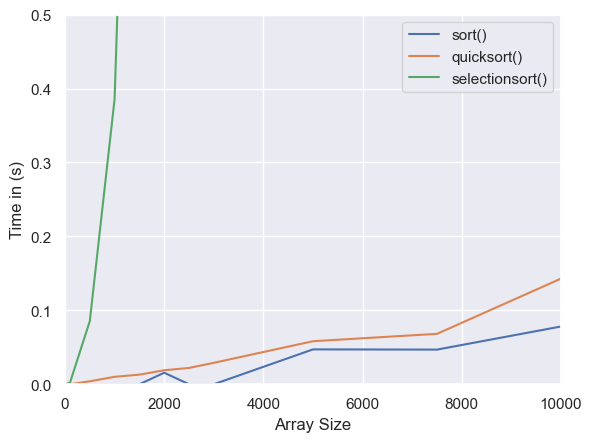

In [95]:
sns.set_theme()

plt.plot(array_sizes, p_times, array_sizes, q_times, array_sizes, s_times)
#plt.yscale("log")
plt.xlabel("Array Size")
plt.ylabel("Time in (s)")
plt.axis([0, 10000, 0, 0.5])
plt.legend(['sort()', 'quicksort()', 'selectionsort()'])

Der von Python gegebene Sortieralgorithmus ist um einiges schneller als quicksort und selectionsort. Der best-case von Quicksort ist 0(nlogn), wenn man das Pivotelement optimal wählt. Wir wählen es aber in unserer Implemenierung sozusagen zufällig. Die Laufzeit von sort() ist immer 0(nlogn). Die Eingabelänge der Arrays für sort() wurden mit Faktor 100 multipliziert, um es im Graphen besser sehen zu können. --> Die Laufzeit von sort() ist (im Durchschnitt) immer schneller als der von Quicksort.

### 9. Plot für Laufzeit von Quicksort und Selectionsort in Java

(0.0, 10000.0, 0.0, 0.3)

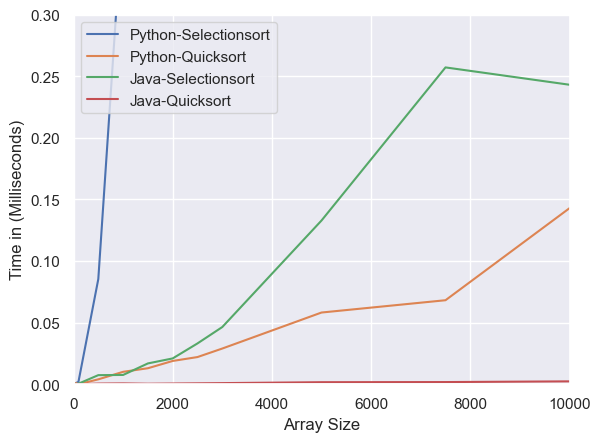

In [93]:
java_selectionsort_times = [1.306E-4, 4.535E-4, 0.0073903, 0.0075469, 0.0169019, 0.0209696, 0.0331489, 0.0464456, 0.1328931, 0.2571736, 0.243108]

java_quicksort_times = [4.54E-5, 4.93E-5, 5.371E-4, 6.846E-4, 4.172E-4, 5.8E-4, 7.524E-4, 9.214E-4, 0.0016682, 0.0017749, 0.002344]

sns.set_theme()
plt.plot(array_sizes, s_times, array_sizes, q_times, array_sizes, java_selectionsort_times, array_sizes, java_quicksort_times)

#plt.yscale("log")
plt.xlabel("Array Size")
plt.ylabel("Time in (Milliseconds)")
plt.legend(['Python-Selectionsort', 'Python-Quicksort','Java-Selectionsort', 'Java-Quicksort'])
plt.axis([0, 10000, 0, 0.3])

#### 10. Verhältnis zwischen theoretischen Analyse und einer effizienten Implementierung? Größenordnung des Konstanten Faktors, der durch die Programmiersprache bestimmt wird?

Die theoretische Analyse ist immer besser, da man die konstanten Faktoren, die man bei einer Implementierung immer hat wegfallen. Das heißt, die Implementierung wird immer mit einem konstanten Faktor behaftet sein. Je nachdem, mit welcher Programmiersprache man arbeitet, können die Faktoren deutlich variieren, wie wir in Aufgabe 8 gesehen haben. Hierbei war der Faktor bei ziemlich genau 70 zwischen Java und Python.
